<a href="https://colab.research.google.com/github/Hasanmog/Journey-Through-AI-Learning/blob/main/DeepLearning_With_Python/DeepLearning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for ComputerVision


## Introduction

working with the MNIST dataset (handwritten numbers)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models , datasets , utils

In [ ]:
model = models.Sequential()

# NN
model.add(layers.Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (28,28 , 1))) # (3,3) is the size of the window where the conv learn local patterns
model.add(layers.MaxPooling2D(2 , 2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))


In [ ]:
model.summary()

In [ ]:
# In order to make the prediction , we need a densley connected classifier
# Dense layer takes 1D tensor only !
# Therfore we need to transform the data coming from the NN(3D) to 1D

model.add(layers.Flatten()) # used to convert to 1D --> (x , y , z) --> (x * y * z)
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dense(10 , activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data() # X --> images(inputs) , y --> labels (target)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# we have 60,000 training samples

In [ ]:
print(y_train.shape)
print(y_train[:10])

In [ ]:
x_train = x_train.reshape((60000 , 28 , 28 , 1)) # adding the channel dimension which is 1 here (grey-scale)
x_test = x_test.reshape((10000 , 28 , 28 , 1))

x_train = x_train / 255 # normalize
x_test = x_test / 255

y_train = utils.to_categorical(y_train) # Converts a class vector (integers) to binary class matrix.
print(y_train[:10])
print(y_train.shape)

y_test = utils.to_categorical(y_test)


In [ ]:
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train , y_train , batch_size = 64 , epochs = 5 )

## Training a ConvNet from Scratch

### Installing dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] =  "hasanmog"  # replace with your Kaggle username
os.environ['KAGGLE_KEY'] =  "f3ccafa264265fe4f3baf59bda89bd0f" # replace with your Kaggle key


In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats # after -d replace with owner_name/dataset_name

In [ ]:
!unzip dogs-vs-cats.zip

### Dataset Prep

In [ ]:
import os , shutil

In [ ]:
os.mkdir("dataset")
os.mkdir("dataset/train")
os.mkdir("dataset/val")
os.mkdir("dataset/test")

In [ ]:
orig_train_dir = 'train/train'
orig_test_dir = 'test/test'

In [ ]:
animals = ['cat' , 'dog']
samples = 500 # train 1000 , val 500 , test 500
sample_per_animal = int(samples/len(animals))

train_dir = 'dataset/train/'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

for animal in animals:
  print(f"now {animal}")
  for sample in range(sample_per_animal ):
    ex = f"{animal}.{sample+1000  }.jpg" # when adding samples to the val_dir , add 1000 to the sample
    print(ex)
    src = os.path.join(orig_train_dir , ex)
    dest = os.path.join(val_dir , ex) # replace train_dir with val_dir for validation split
    shutil.copyfile(src , dest)

In [ ]:
samples = 499
test_samples = os.listdir(orig_test_dir)
s = test_samples[:samples+1]

for sample in s:

  src = os.path.join(orig_test_dir , sample)
  dest = os.path.join(test_dir , sample )
  shutil.copyfile(src , dest)

In [ ]:
train_samples = os.listdir(train_dir)
# note , for test it will return 0 , since the samples are not named after the animal
val_samples = os.listdir(val_dir)
test_samples = os.listdir(test_dir)

print("number of training samples" , len(train_samples))
print("number of val samples" , len(val_samples))
print("number of test samples" , len(test_samples))

dogs = 0
cats = 0

for train in train_samples : #change the train_samples to val_samples

  if train.startswith('dog'):
    dogs+=1

  if train.startswith('cat'):
    cats+=1


print("number of dogs samples" , dogs)
print("number of cats samples" , cats)

In [ ]:
import cv2

img = cv2.imread(os.path.join(train_dir , train_samples[10]))

size = (250 , 250)

img = cv2.resize(img , size)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
print(train_samples[0])

In [ ]:
import os

base_train_dir = "dataset/train"
base_val_dir = "dataset/val"
base_test_dir = "dataset/test"

dogs = []
cats = []

for m in os.listdir(base_val_dir):

  if  m.startswith('dog'):
    dogs.append(m)

  if m.startswith('cat'):
    cats.append(m)

# train_dogs_dir = os.mkdir("dataset/train/dogs")
# train_cats_dir = os.mkdir("dataset/train/cats")
# val_dogs_dir = os.mkdir("dataset/val/dogs")
# val_cats_dir = os.mkdir("dataset/val/cats")

for i in dogs:
  src = os.path.join(base_val_dir , i)
  dest = "dataset/val/dogs"
  shutil.move(src , dest)

for i in cats:
  src = os.path.join(base_val_dir , i)
  dest = "dataset/val/cats"
  shutil.move(src , dest)

### Building Network

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32  , (3,3) , activation = 'relu' , input_shape = (250 , 250 ,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(learning_rate = 1e-4) , loss = 'binary_crossentropy' , metrics = ['acc'] )

In [ ]:
train_dir = 'dataset/train/'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

In [ ]:
#DataLoading

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (250,250) ,
                                                    batch_size = 20 ,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_dir ,
                                                        target_size = (250,250) ,
                                                        batch_size = 25 ,
                                                        class_mode = 'binary')

In [ ]:
#testing dataloader:

for data_batch , labels_batch in train_generator :
  print('data' , data_batch.shape)
  print('labels' , labels_batch.shape)
  break

In [ ]:
import json

history = model.fit_generator(train_generator ,
                              steps_per_epoch = 50 ,
                              epochs = 10 ,
                              validation_data = validation_generator ,
                              validation_steps = 20)

model.save('cats_and_dogs_small_1.h5')

In [ ]:
with open('model_history.json' , 'w') as f :
  json.dump(history.history , f)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs , acc , 'bo' , label = 'Training Acc')
plt.plot(epochs , val_acc , 'b' , label = 'Val Acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Val loss')
plt.title("Training vs Validation loss")
plt.legend()

plt.show()

As you can see clearly , We have overfitting problem

### Adding DropOut layer and Data Augmentation to increase dataset

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32  , (3,3) , activation = 'relu' , input_shape = (250 , 250 ,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))


model.summary()

In [ ]:
#Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    rotation_range = 40 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (250,250) ,
                                                    batch_size = 16,
                                                    class_mode = 'binary')

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(learning_rate = 1e-4) , loss = 'binary_crossentropy' , metrics = ['acc'] )

In [ ]:
history = model.fit_generator(
    train_generator ,
    steps_per_epoch = 50,
    epochs = 100 ,
    validation_data = validation_generator ,
    validation_steps = 25
)

model.save('cats_and_dogs_small_2.h5')

In [ ]:
import json

with open('model_history_2.json' , 'w') as f :

  json.dump(history.history , f)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs , acc , 'bo' , label = 'Training Acc')
plt.plot(epochs , val_acc , 'b' , label = 'Val Acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Val loss')
plt.title("Training vs Validation loss")
plt.legend()

plt.show()

As you can see the performance increased significantly compared to unaugmented model.

By applying L1 or L2 regularization will enhance the results more.

## Using a Pretrained Model

### For Feature Extraction

will use pretrained [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16).
[Architecture](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.geeksforgeeks.org%2Fvgg-16-cnn-model%2F&psig=AOvVaw18JAs0D2qlc6YD2pWEy9WT&ust=1703869812399000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCKCkvevPsoMDFQAAAAAdAAAAABAI)


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(
    include_top = False , # classifer
    weights = 'imagenet' ,
    input_shape = (250 , 250 , 3)
)

In [ ]:
conv_base.summary()

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))

model.summary()

In [ ]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5) , loss = 'binary_crossentropy' , metrics = ['acc'])

In [ ]:
#Needs GPU to run it


history = model.fit_generator(
    train_generator ,
    steps_per_epoch = 50 ,
    epochs = 15,
    validation_data = validation_generator ,
    validation_steps = 25
)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs , acc , 'bo' , label = 'Training Acc')
plt.plot(epochs , val_acc , 'b' , label = 'Val Acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Val loss')
plt.title("Training vs Validation loss")
plt.legend()

plt.show()

### FineTuning

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer == 'block5_conv1':
    set_trainable = True

  if set_trainable:
    layer.trainable = True

  else :
    layer.trainable = False

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = optimizers.RMSprop(learning_rate = 1e-5) , metrics = ['acc'])

In [ ]:
#needs GPU

history = model.fit_generator(
    train_generator ,
    steps_per_epoch = 50 ,
    epochs = 100 ,
    validation_data = validation_generator ,
    validation_steps = 50
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size = (250 ,250) ,
    batch_size = 20,
    class_mode = 'binary'
)

test_loss , test_acc = model.evaluate_generator(test_generator , steps = 50)
print("test_acc :" , test_acc)

# Introduction to tensorflow/keras

## Building a Simple Classifier

In [ ]:
import numpy as np

num_samples_per_class = 1000

# Generate the first class of points
negative_samples = np.random.multivariate_normal(
    mean = [0 , 3] ,
    cov = [[1 , 0.5] , [0.5 , 1]], # this corresponds to oval-like point cloud oriented from bottom left to top right
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3 , 0] ,
    cov = [[1 , 0.5] , [0.5 , 1]],
    size = num_samples_per_class
)

inputs = np.vstack((negative_samples , positive_samples)).astype(np.float32) # stacking the two classes in an array of shape (2000 , 2)

targets = np.vstack((np.zeros((num_samples_per_class , 1) , dtype = "float32") , np.ones((num_samples_per_class , 1) , dtype = 'float32')))

In [ ]:
import tensorflow as tf

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim , output_dim))) #can be modified
b = tf.Variable(initial_value= tf.zeros(shape = (output_dim ,)))

In [ ]:
#Forward Pass

def model(inputs):
  return tf.matmul(inputs , W) + b

#Loss Function

def square_loss(targets , predicitions):
  per_sample_loss = tf.square(targets - predicitions)
  return tf.reduce_mean(per_sample_loss)

lr = 0.1

def training_step(inputs , targets):
  with tf.GradientTape() as tape: #This line sets up a context in which TensorFlow will record operations for the forward pass to compute gradients later.
    # Forward pass
    predicitions = model(inputs)
    loss = square_loss(targets , predicitions)
  #Retrieve the gradient of the loss with regard to weights
  grad_loss_wrt_W , grad_loss_wrt_b = tape.gradient(loss , [W,b])
  # update the weights
  W.assign_sub(grad_loss_wrt_W * lr)
  b.assign_sub(grad_loss_wrt_b * lr)
  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs , targets)
  print(f"Loss at step{step}: {loss:.4f}")

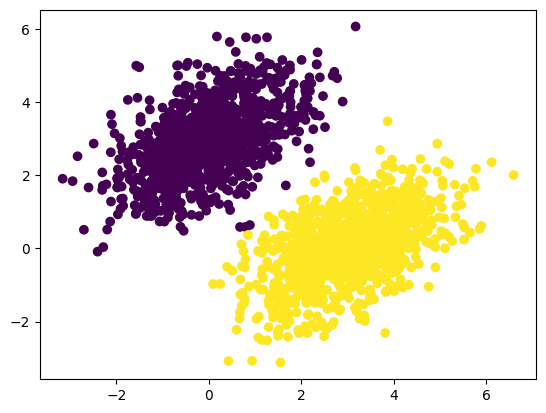

In [ ]:
import matplotlib.pyplot as plt

predicitions = model(inputs)
plt.scatter(inputs[: , 0] , inputs[: , 1] , c = predicitions[: , 0] > 0.5)
plt.show()

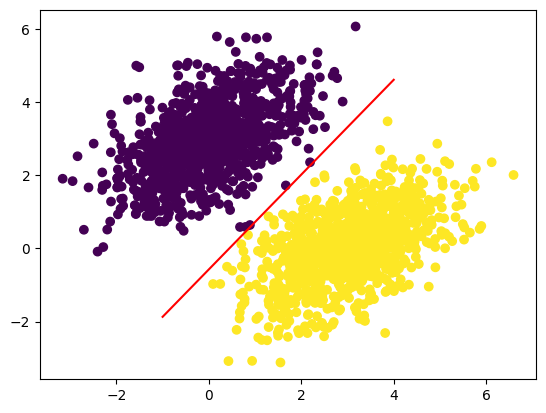

In [ ]:
x = np.linspace(-1 , 4 , 100) # generate 100 regulary spaced numbers between -1 and 4

y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x , y , "-r")
plt.scatter(inputs[: , 0] , inputs[: , 1] , c = predicitions[: , 0] > 0.5)

## Building Block of Deep Learning

In [4]:
from tensorflow import keras
import tensorflow as tf
class SimpleDense(keras.layers.Layer): #all keras layers inherit from the base Layer class

  def __init__(self , units , activation = None):
    super().__init__()
    self.units = units
    self.activation = activation

  # weight creation takes place in the build() method
  def build(self , input_shape):
    input_dim = input_shape[-1]
    '''
    add_weight() is a shortcut method for creating weights , we can use tf.Variable like before.

     '''
    self.W = self.add_weight(shape = (input_dim , self.units) , initializer = "random_normal")
    self.b = self.add_weight(shape = (self.units) , initializer = "zeros")

  # forward pass is defined in the call functions
  def call(self , inputs):
    y = tf.matmul(inputs , self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)

    return y

In [5]:
my_dense = SimpleDense(units = 32 , activation = tf.nn.relu)

input_tensor = tf.ones(shape = (2 , 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
# this is the same as the follows:

model = keras.Sequential([

    layers.Dense(32 , activation = "relu") ,
    layers.Dense(32)
]

# Advanced Deep Learning for Computer Vision

## Image Segmentation

In this example , we will focus on ** semantic segmentation **

dataset : https://www.robots.ox.ac.uk/~vgg/data/pets/

### Dataset Download

In [1]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2024-01-03 07:39:52--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2024-01-03 07:39:52--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M   160MB/s    in 5.6s    

2024-01-03 07:39:58 (134 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2024-01-03 07:39:58--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.u

In [3]:
import tarfile
import os

# Replace 'your-file.tar.gz' with the path to your .tar.gz file
file_path = '/content/images.tar.gz'
file_path_2 = '/content/annotations.tar.gz'

# Define the directory where you want to extract the files. It can be '.' to extract in the current directory.
extract_dir = '/content/images'
extract_dir_2 = '/content/annotations'

# Make sure the extract directory exists
os.makedirs(extract_dir, exist_ok=True)

# Open the .tar.gz file and extract it
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

print(f"Extracted all contents of {file_path} to {extract_dir}")


Extracted all contents of /content/images.tar.gz to /content/images


In [4]:
import os

images_dir = "/content/images/images"
annotations_dir = "/content/annotations/annotations/trimaps"

input_images = []
img_files = sorted(os.listdir(images_dir))
for files in img_files:
  if files.endswith('.jpg'):
    input_images.append(os.path.join(images_dir , files))


#More advanced way to write it (more professional):

#input_images = sorted ([
 # os.path.join(images_dir , fname) for fname in os.listdir(images_dir) if fname.endswith(".jpg")
#])

In [5]:
input_images[:10]

['/content/images/images/Abyssinian_1.jpg',
 '/content/images/images/Abyssinian_10.jpg',
 '/content/images/images/Abyssinian_100.jpg',
 '/content/images/images/Abyssinian_101.jpg',
 '/content/images/images/Abyssinian_102.jpg',
 '/content/images/images/Abyssinian_103.jpg',
 '/content/images/images/Abyssinian_104.jpg',
 '/content/images/images/Abyssinian_105.jpg',
 '/content/images/images/Abyssinian_106.jpg',
 '/content/images/images/Abyssinian_107.jpg']

In [6]:
target_paths = sorted([
    os.path.join(annotations_dir , anno) for anno in os.listdir(annotations_dir) if anno.endswith(".png") and not anno.startswith(".") ])

In [7]:
target_paths[:10]

['/content/annotations/annotations/trimaps/Abyssinian_1.png',
 '/content/annotations/annotations/trimaps/Abyssinian_10.png',
 '/content/annotations/annotations/trimaps/Abyssinian_100.png',
 '/content/annotations/annotations/trimaps/Abyssinian_101.png',
 '/content/annotations/annotations/trimaps/Abyssinian_102.png',
 '/content/annotations/annotations/trimaps/Abyssinian_103.png',
 '/content/annotations/annotations/trimaps/Abyssinian_104.png',
 '/content/annotations/annotations/trimaps/Abyssinian_105.png',
 '/content/annotations/annotations/trimaps/Abyssinian_106.png',
 '/content/annotations/annotations/trimaps/Abyssinian_107.png']

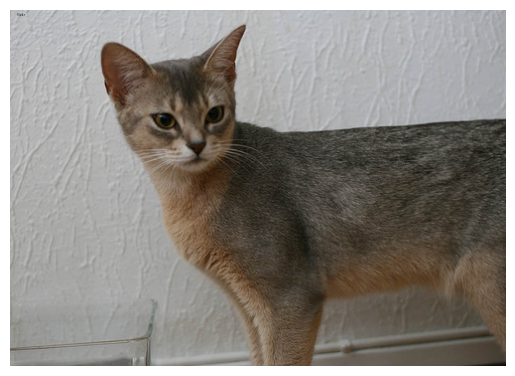

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img , img_to_array

index = 50
plt.axis("off")
plt.imshow(load_img(input_images[index]))

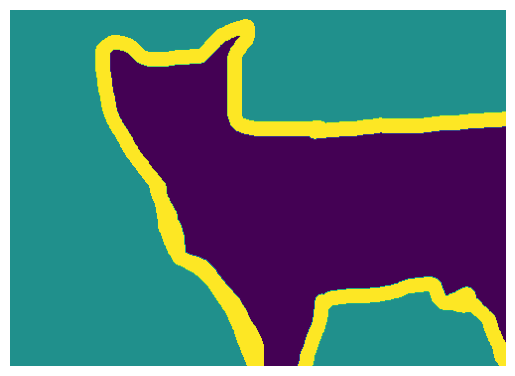

In [9]:
#annotations are pixel level trimap segmentation --> contains only 3 labels (1 , 2, 3)

def display_target(target_array):
  normalized_array = (target_array.astype("uint8") - 1) * 127 # subtract by 1 so that the labels range between 0 to 2.
  plt.axis("off")
  plt.imshow(normalized_array[: , :  , 0])

img = img_to_array(load_img(target_paths[index] , color_mode = "grayscale"))
display_target(img)

### dataset splitting

In [10]:
import numpy as np
import random

img_size = (200 , 200) # will resize everything to img_size

num_imgs = len(input_images)
print("total number of samples" , num_imgs)
random.Random(1337).shuffle(input_images)
random.Random(1337).shuffle(target_paths)

def path2image(image_path):
  return img_to_array(load_img(image_path , target_size = img_size))

def path2target(target_path):
  img = img_to_array(load_img(target_path , target_size = img_size , color_mode = 'grayscale')) # channel dim will be 1
  img = img.astype("uint8") - 1
  return img

input_imgs = np.zeros((num_imgs , ) + img_size + (3 , ) , dtype = "float32") # images are RGB
targets = np.zeros((num_imgs ,) + img_size + (1,) , dtype = "uint8") # targets are grayscale
for i in range(num_imgs):
  input_imgs[i] = path2image(input_images[i])
  targets[i] = path2target(target_paths[i])

num_val = 1000

train_input_imgs = input_imgs[: -num_val]
train_targets = targets[: -num_val]
val_input_imgs = input_imgs[-num_val:]
val_targets = targets[-num_val:]

total number of samples 7390


### Model Creation

The purpose of the first half of this model is to encode the images into smaller feature maps , where each spatial location (pixel) contains information about a large spatial chunk of the image. In other words, COMPRESSION.

Difference between this and the model we did for image classification , is that we used MaxPooling layers while here we used strides to downsample. This is because , in image segmentation , we care a lot about the spatial location of information in the image since we need to produce per pixel target mask as output of the model.

2x2 maxpooling destroys completely the location information within each pooling window --> return one scaler value per window , with zero knowledge of which of the four locations in the windows the value came from.


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model , layers

def get_model(img_size , num_classes):

  inputs = keras.Input(shape = img_size + (3,)) # (200 ,200) + (3,) for RGB --> (200 , 200 , 3)
  x = layers.Rescaling(1./255)(inputs) # range between 0 and 1
  #upsample
  x = layers.Conv2D(64 , 3 ,  strides = 2 , activation = 'relu' , padding = 'same')(x)
  x = layers.Conv2D(64 , 3 ,   activation = 'relu' , padding = 'same')(x)
  x = layers.Conv2D(128 , 3 ,  strides = 2 , activation = 'relu' , padding = 'same')(x)
  x = layers.Conv2D(128, 3 ,   activation = 'relu' , padding = 'same')(x)
  x = layers.Conv2D(256 , 3 ,  strides = 2 , activation = 'relu' , padding = 'same')(x)
  x = layers.Conv2D(256 , 3 , activation = 'relu' , padding = 'same')(x)
  #downsample
  x = layers.Conv2DTranspose(256 , 3 , activation = 'relu' , padding = 'same' )(x)
  x = layers.Conv2DTranspose(256 , 3 , activation = 'relu' , padding = 'same' , strides = 2 )(x)
  x = layers.Conv2DTranspose(128 , 3 , activation = 'relu' , padding = 'same' )(x)
  x = layers.Conv2DTranspose(128 , 3 , activation = 'relu' , padding = 'same' , strides = 2)(x)
  x = layers.Conv2DTranspose(64 , 3 , activation = 'relu' , padding = 'same' )(x)
  x = layers.Conv2DTranspose(64 , 3 , activation = 'relu' , padding = 'same' , strides = 2 )(x)

  outputs = layers.Conv2D(num_classes , 3 , activation = "softmax" , padding = 'same')(x)

  model = keras.Model(inputs , outputs)
  return model

model = get_model(img_size = (200,200) , num_classes = 3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

In [13]:
model.compile(optimizer = 'rmsprop' , loss = 'sparse_categorical_crossentropy')
callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras" ,
                                    save_best_only = True)
]

history = model.fit(train_input_imgs ,
                    train_targets ,
                    epochs = 15 ,
                    callbacks = callbacks ,
                    batch_size = 64 ,
                    validation_data = (val_input_imgs , val_targets))

Epoch 1/15
100/100 [==============================] - 60s 586ms/step - loss: 0.7615 - val_loss: 0.7360
Epoch 2/15
100/100 [==============================] - 58s 578ms/step - loss: 0.7453 - val_loss: 0.7360
Epoch 3/15
100/100 [==============================] - 58s 579ms/step - loss: 0.7375 - val_loss: 0.7568
Epoch 4/15
100/100 [==============================] - 58s 581ms/step - loss: 0.7156 - val_loss: 0.7067
Epoch 5/15
100/100 [==============================] - 58s 581ms/step - loss: 0.6927 - val_loss: 0.6425
Epoch 6/15
100/100 [==============================] - 58s 581ms/step - loss: 0.6687 - val_loss: 0.6167
Epoch 7/15
100/100 [==============================] - 58s 580ms/step - loss: 0.6419 - val_loss: 0.6013
Epoch 8/15
100/100 [==============================] - 58s 579ms/step - loss: 0.6181 - val_loss: 0.7297
Epoch 9/15
100/100 [==============================] - 58s 580ms/step - loss: 0.5981 - val_loss: 0.5809
Epoch 10/15
100/100 [==============================] - 58s 580ms/step - l

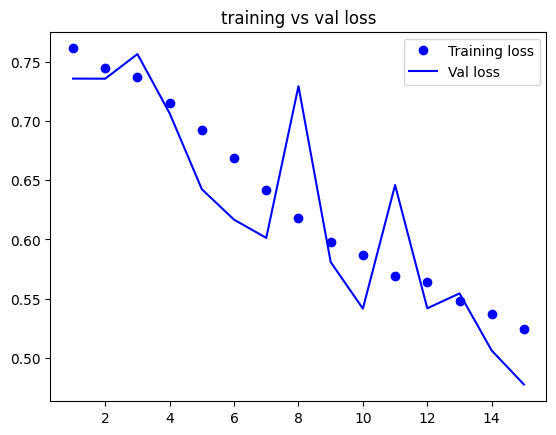

In [16]:
epochs = range(1 , len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs , loss , "bo" , label = "Training loss")
plt.plot(epochs , val_loss , "b" , label = "Val loss")
plt.title("training vs val loss")
plt.legend()

1/1 [==============================] - 0s 164ms/step


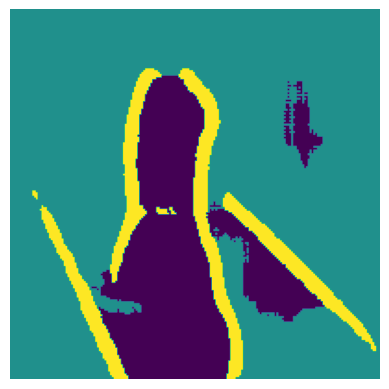

In [18]:
from tensorflow.keras.utils import array_to_img

model = keras.models.load_model("/content/oxford_segmentation.keras")

i = 4
test_image = val_input_imgs[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))
mask = model.predict(np.expand_dims(test_image , 0))[0]

def display_mask(pred):
  mask = np.argmax(pred , axis = -1)
  mask*=127
  plt.axis("off")
  plt.imshow(mask)

display_mask(mask)

**It needs more training !**